# Import Data

In [91]:
import pandas as pd
import numpy as np 

In [92]:
data = pd.read_csv('Data/bbca_data_5y.csv')

In [93]:
data['date_str'] = pd.to_datetime(data['date_str'])

In [94]:
# rename columns
data = data.rename(columns={'date_str': 'date'})

In [95]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
0,5633.568658,5660.523532,5615.598742,5651.538574,58420500,0.0,0.0,2019-10-31
1,5660.522959,5682.985352,5638.060566,5682.985352,42080500,0.0,0.0,2019-11-01
2,5705.447725,5732.402596,5624.583111,5638.060547,43794500,0.0,0.0,2019-11-04
3,5705.447660,5714.432617,5633.568005,5714.432617,66161500,0.0,0.0,2019-11-05
4,5732.401911,5732.401911,5656.029785,5656.029785,63393000,0.0,0.0,2019-11-06


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Open          1213 non-null   float64       
 1   High          1213 non-null   float64       
 2   Low           1213 non-null   float64       
 3   Close         1213 non-null   float64       
 4   Volume        1213 non-null   int64         
 5   Dividends     1213 non-null   float64       
 6   Stock Splits  1213 non-null   float64       
 7   date          1213 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 75.9 KB


In [97]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
date            0
dtype: int64

# Feature Engineering

In [98]:
data['Dividends'].value_counts()

Dividends
0.0      1203
20.0        1
91.0        1
19.6        1
86.4        1
25.0        1
120.0       1
35.0        1
170.0       1
42.5        1
227.5       1
Name: count, dtype: int64

In [99]:
data['Stock Splits'].value_counts()

Stock Splits
0.0    1212
5.0       1
Name: count, dtype: int64

In [102]:
data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [100]:
# 1. Menghitung Return Harian
data['return'] = data['Close'].pct_change()
data['log_return'] = np.log(data['Close'] / data['Close'].shift(1))

In [104]:
# 2. Moving Averages
data['ma_5'] = data['Close'].rolling(window=5).mean()
data['ma_10'] = data['Close'].rolling(window=10).mean()
data['ma_20'] = data['Close'].rolling(window=20).mean()

In [107]:
# 3. Exponential Moving Average (EMA)
data['ema_10'] = data['Close'].ewm(span=10, adjust=False).mean()
data['ema_20'] = data['Close'].ewm(span=20, adjust=False).mean()

In [108]:
# 4. Bollinger Bands
data['bollinger_mid'] = data['Close'].rolling(window=20).mean()
data['bollinger_std'] = data['Close'].rolling(window=20).std()
data['bollinger_upper'] = data['bollinger_mid'] + (2 * data['bollinger_std'])
data['bollinger_lower'] = data['bollinger_mid'] - (2 * data['bollinger_std'])

In [109]:
# 10. Penambahan Fitur Waktu
data['day_of_week'] = data['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
data['month'] = data['date'].dt.month

In [111]:
# Hapus data yang mengandung nilai NaN akibat perhitungan rolling
data = data.dropna().reset_index(drop=True)

In [113]:
data.head()

,Open,High,Low,Close,Volume,date,return,log_return,ma_5,ma_10,ma_20,ema_10,ema_20,bollinger_mid,bollinger_std,bollinger_upper,bollinger_lower,day_of_week,month
0,5633.567592,5660.522461,5606.612723,5660.522461,58833500,2019-11-27,0.002387,0.002384,5654.232910,5656.479346,5656.254785,5656.135917,5655.397281,5656.254785,22.882915,5702.020616,5610.488955,2,11
1,5656.029959,5656.029959,5611.105178,5615.597656,44248000,2019-11-28,-0.007937,-0.007968,5645.247949,5654.682373,5654.457739,5648.765324,5651.606841,5654.457739,24.618244,5703.694226,5605.221252,3,11
2,5597.627951,5656.030169,5593.135473,5642.552734,52954500,2019-11-29,0.004800,0.004789,5640.755566,5655.131592,5652.436108,5647.635762,5650.744545,5652.436108,23.798789,5700.033687,5604.838530,4,11
3,5642.552605,5772.834473,5633.567649,5772.834473,49909000,2019-12-02,0.023089,0.022827,5667.710352,5668.159766,5659.174805,5670.399164,5662.372157,5659.174805,35.646048,5730.466900,5587.882709,0,12
4,5768.341972,5768.341972,5700.954799,5727.909668,42823000,2019-12-03,-0.007782,-0.007813,5683.883398,5673.550635,5659.848657,5680.855619,5668.613825,5659.848657,36.852585,5733.553828,5586.143486,1,12


In [116]:
data.isnull().sum()

Open               0
High               0
Low                0
Close              0
Volume             0
date               0
return             0
log_return         0
ma_5               0
ma_10              0
ma_20              0
ema_10             0
ema_20             0
bollinger_mid      0
bollinger_std      0
bollinger_upper    0
bollinger_lower    0
day_of_week        0
month              0
dtype: int64

# Preprocessing

In [117]:
dataUsed = data[['Close', 'Volume', 'ma_5', 'ma_10', 'ma_20', 'ema_10', 'ema_20', 'bollinger_mid', 'bollinger_std', 'bollinger_upper', 'bollinger_lower', 'day_of_week', 'month']]

In [118]:
from sklearn.preprocessing import MinMaxScaler

# preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(dataUsed)

data_scaled

array([[0.23969743, 0.07777769, 0.21817154, ..., 0.27528493, 0.5       ,
        0.90909091],
       [0.23323999, 0.05849571, 0.21682084, ..., 0.27446791, 0.75      ,
        0.90909091],
       [0.23711448, 0.07000567, 0.2161455 , ..., 0.27440854, 1.        ,
        0.90909091],
       ...,
       [0.93531759, 0.06567692, 0.96767917, ..., 0.99948838, 0.25      ,
        0.81818182],
       [0.91375679, 0.15134759, 0.9586594 , ..., 0.99624454, 0.5       ,
        0.81818182],
       [0.89938292, 0.12896526, 0.94512975, ..., 0.99061983, 0.75      ,
        0.81818182]])

# Modelling

## Train Test Sequence

In [119]:
import numpy as np

# sequence generator 60 days
sequence_length = 60
x = []
y = []

for i in range(sequence_length, len(data_scaled)):
    x.append(data_scaled[i-sequence_length:i])
    y.append(data_scaled[i,3])

x, y = np.array(x), np.array(y)

In [120]:
print(x.shape, y.shape)

(1134, 60, 13) (1134,)


In [121]:
from sklearn.model_selection import train_test_split

# train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## LSTM

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [123]:
# LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [124]:
# train model
model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_test, y_test), verbose=1)

Epoch 1/25
29/29 [==============================] - 6s 62ms/step - loss: 0.0332 - val_loss: 0.0055
Epoch 2/25
29/29 [==============================] - 1s 32ms/step - loss: 0.0067 - val_loss: 0.0015
Epoch 3/25
29/29 [==============================] - 1s 32ms/step - loss: 0.0047 - val_loss: 0.0011
Epoch 4/25
29/29 [==============================] - 1s 31ms/step - loss: 0.0043 - val_loss: 9.4061e-04
Epoch 5/25
29/29 [==============================] - 1s 32ms/step - loss: 0.0038 - val_loss: 9.3964e-04
Epoch 6/25
29/29 [==============================] - 1s 31ms/step - loss: 0.0034 - val_loss: 7.9561e-04
Epoch 7/25
29/29 [==============================] - 1s 32ms/step - loss: 0.0042 - val_loss: 0.0021
Epoch 8/25
29/29 [==============================] - 1s 31ms/step - loss: 0.0035 - val_loss: 0.0012
Epoch 9/25
29/29 [==============================] - 1s 34ms/step - loss: 0.0037 - val_loss: 0.0017
Epoch 10/25
29/29 [==============================] - 1s 34ms/step - loss: 0.0034 - val_loss: 8.15

In [126]:
# prediction
predicted_prices =  model.predict(x_test)


8/8 [==============================] - 0s 10ms/step


In [133]:
# Dapatkan jumlah kolom yang diharapkan oleh scaler
expected_columns = scaler.min_.shape[0]  # Ini adalah 13 dalam kasus Anda

# Tambahkan kolom nol untuk menyesuaikan jumlah kolom
predicted_prices_padded = np.hstack([np.zeros((predicted_prices.shape[0], expected_columns - 1)), predicted_prices])

# Inverse transform dan ambil hanya kolom harga 'Close'
predicted_prices = scaler.inverse_transform(predicted_prices_padded)[:, -1]  # Ambil hanya kolom harga


In [137]:
expected_columns = scaler.min_.shape[0]  # Ini adalah 13 dalam kasus Anda

# Tambahkan kolom nol untuk menyesuaikan jumlah kolom
real_prices_padded = np.hstack([np.zeros((y_test.shape[0], expected_columns - 1)), y_test.reshape(-1,1)])

# Inverse transform dan ambil hanya kolom harga 'Close'
real_prices = scaler.inverse_transform(real_prices_padded)[:, -1]  # Ambil hanya kolom harga


In [138]:
real_prices

array([ 8.29222756,  8.23603051,  5.2871986 ,  5.86497058,  7.43214798,
        3.01337832,  6.1008896 ,  1.20678997, 10.2936704 ,  9.6641267 ,
        8.01324361,  2.32806422,  6.98743696,  8.25764499,  7.25414573,
        8.39597634,  6.91509457,  8.65967026,  7.53386339,  5.32028139,
        2.98485748,  3.53676148,  9.61200505,  2.35169549,  2.43073899,
        1.21864891,  3.47215124,  3.535104  ,  3.13433247,  2.96611518,
        3.06797526,  5.16643782,  8.65534715,  6.2233175 ,  8.34714241,
        1.00560705, 10.08110024, 10.68470427,  5.3493871 ,  6.89033869,
        3.15688504,  4.62829846,  8.41759047,  3.53245617,  8.67263853,
       11.5200948 ,  2.46903837,  5.67450196,  9.54270763,  7.31348019,
        3.38591923,  6.20176351,  3.48606012,  3.66191141,  8.74612731,
        2.19116479, 10.62642515, 11.06240743,  4.00431009,  5.50141453,
        8.67263853,  9.88486226,  1.3322815 ,  5.2329647 , 11.6933939 ,
       10.4936309 ,  3.22761725,  5.54785258,  5.1581221 ,  6.01

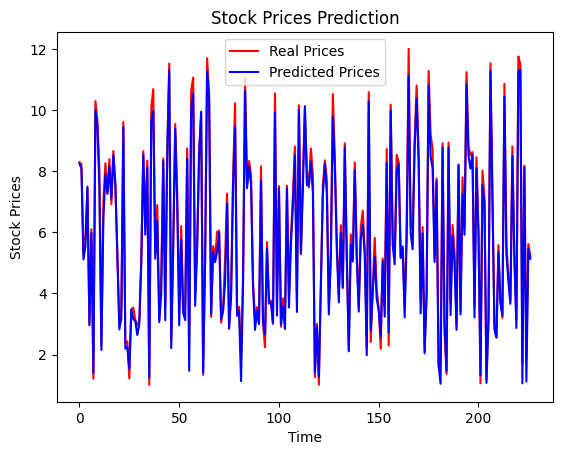

In [139]:
# conpare real and predicted prices
import matplotlib.pyplot as plt

plt.plot(real_prices, color='red', label='Real Prices')
plt.plot(predicted_prices, color='blue', label='Predicted Prices')
plt.title('Stock Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

In [140]:
# calculate RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
rmse

0.3262641886080081

In [141]:
# count accuracy
accuracy = 1 - rmse / np.mean(real_prices)
accuracy

0.944766314965018